In [11]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [47]:
# read the image
img = plt.imread('tree.jpg')

In [48]:
# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

In [49]:
# SOM initialization and training
print('training...')
som = MiniSom(4, 8, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
print('done.')

training...


 [  1402 / 10000 ]  14% - 0:00:02 left 

 [  2239 / 10000 ]  22% - 0:00:01 left 

 [  2990 / 10000 ]  30% - 0:00:01 left 

 [  3968 / 10000 ]  40% - 0:00:01 left 

 [  4737 / 10000 ]  47% - 0:00:01 left 

 [  5197 / 10000 ]  52% - 0:00:01 left 

 [  5956 / 10000 ]  60% - 0:00:01 left 

 [  6700 / 10000 ]  67% - 0:00:00 left 

 [  7000 / 10000 ]  70% - 0:00:00 left 

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.07439898874133158
quantization...
building new image...
done.


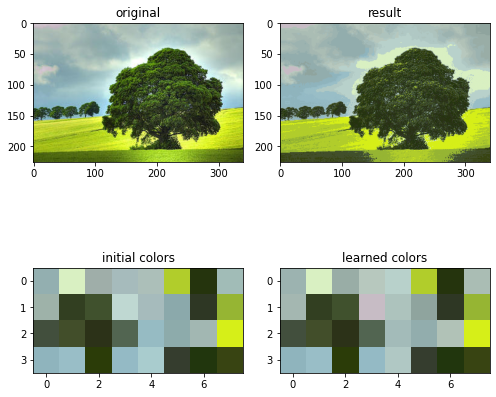

In [50]:
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.savefig('hasil/som_color_quantization.png')
plt.show()